<a href="https://colab.research.google.com/github/EsraaaMohammed/Selected-Project_Phase1/blob/main/Project_phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
dataset = pd.read_csv('Salary Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, [0, 4]])  # تطبيق التعويض على الأعمدة العددية فقط
X[:, [0, 4]] = imputer.transform(X[:, [0, 4]])

In [4]:
y = y.reshape(-1, 1)  # تحويل y إلى مصفوفة 2D عشان ينفع نطبّق عليه imputer
imputer_y = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_y.fit(y)
y = imputer_y.transform(y)
y = y.ravel()  # تحويل y تاني إلى 1D بعد التعويض

In [5]:
print(X)

[[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0]
 ...
 [29.0 'Female' "Bachelor's" 'Junior Project Manager' 2.0]
 [34.0 'Male' "Bachelor's" 'Senior Operations Coordinator' 7.0]
 [44.0 'Female' 'PhD' 'Senior Business Analyst' 15.0]]


In [6]:
print(y)

[ 90000.         65000.        150000.         60000.
 200000.         55000.        120000.         80000.
  45000.        110000.         75000.        140000.
  65000.        130000.         40000.        125000.
  90000.        115000.         35000.        180000.
  80000.        190000.         50000.         60000.
 140000.         45000.        110000.         40000.
 140000.         90000.        250000.         55000.
  75000.         65000.        170000.         45000.
  60000.        115000.         40000.        160000.
  80000.        190000.         60000.         45000.
 130000.         40000.         75000.        180000.
 120000.         35000.        130000.         85000.
  60000.        200000.         50000.         95000.
  65000.        140000.         55000.        105000.
 170000.         50000.         80000.        180000.
  35000.         90000.        120000.         45000.
  90000.        150000.         65000.         70000.
 190000.         40000.     

In [7]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3])], remainder='passthrough')
#X = np.array(ct.fit_transform(X))
X = ct.fit_transform(X).toarray()

In [8]:
print(X)

[[ 0.  1.  0. ...  0. 32.  5.]
 [ 1.  0.  0. ...  0. 28.  3.]
 [ 0.  1.  0. ...  0. 45. 15.]
 ...
 [ 1.  0.  0. ...  0. 29.  2.]
 [ 0.  1.  0. ...  0. 34.  7.]
 [ 1.  0.  0. ...  0. 44. 15.]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
print(X_train)

[[ 0.  1.  0. ...  0. 34.  7.]
 [ 0.  1.  0. ...  0. 37. 10.]
 [ 1.  0.  0. ...  0. 29.  2.]
 ...
 [ 0.  1.  0. ...  0. 45. 16.]
 [ 1.  0.  0. ...  0. 28.  1.]
 [ 1.  0.  0. ...  0. 49. 19.]]


In [11]:
print(X_test)

[[ 0.  1.  0. ...  0. 46. 18.]
 [ 1.  0.  0. ...  0. 39. 10.]
 [ 0.  1.  0. ...  0. 44. 16.]
 ...
 [ 1.  0.  0. ...  0. 44. 16.]
 [ 1.  0.  0. ...  0. 44. 15.]
 [ 0.  1.  0. ...  0. 36.  8.]]


In [12]:
print(y_train)

[ 95000.         95000.         40000.         70000.
  90000.        120000.        100000.         80000.
  90000.         65000.        130000.        100000.
 120000.        130000.        110000.         70000.
 170000.        185000.         40000.        140000.
 120000.        110000.        115000.        120000.
 140000.         45000.         55000.         50000.
  35000.         40000.         50000.        180000.
  85000.         95000.         70000.         90000.
 140000.         55000.        180000.         40000.
  55000.         50000.         35000.         60000.
  80000.         60000.         45000.         80000.
  55000.         60000.         35000.         40000.
  70000.         60000.        120000.         85000.
 140000.        105000.         95000.         95000.
 120000.         60000.        180000.         75000.
  40000.         50000.         80000.         40000.
 120000.        120000.         35000.         80000.
 130000.        140000.     

In [13]:
print(y_test)

[150000.         65000.        125000.         80000.
 140000.        180000.        160000.        120000.
  50000.         95000.        140000.        160000.
  40000.         95000.         65000.        160000.
  90000.         50000.         90000.         95000.
 110000.        105000.        190000.         70000.
 120000.         50000.        180000.        100577.3458445
 140000.        170000.         45000.        100000.
  60000.        150000.        115000.         35000.
 180000.         50000.         35000.         50000.
  40000.         95000.        250000.        170000.
  40000.        140000.        120000.         65000.
  55000.         40000.        120000.         90000.
  85000.        100000.        170000.         60000.
 170000.         60000.         45000.        100000.
 100000.        140000.        180000.         75000.
  40000.         40000.         50000.        110000.
  40000.         30000.         75000.         90000.
 160000.        15000

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print(X_train)

[[-0.98675438  0.99335541 -0.05783149 ... -0.05783149 -0.50558015
  -0.47750214]
 [-0.98675438  0.99335541 -0.05783149 ... -0.05783149 -0.07648871
  -0.01417315]
 [ 1.01342342 -1.00668904 -0.05783149 ... -0.05783149 -1.22073256
  -1.24971713]
 ...
 [-0.98675438  0.99335541 -0.05783149 ... -0.05783149  1.06775513
   0.91248484]
 [ 1.01342342 -1.00668904 -0.05783149 ... -0.05783149 -1.36376304
  -1.40416012]
 [ 1.01342342 -1.00668904 -0.05783149 ... -0.05783149  1.63987705
   1.37581383]]


In [16]:
print(X_test)

[[-0.98675438  0.99335541 -0.05783149 ... -0.05783149  1.21078561
   1.22137083]
 [ 1.01342342 -1.00668904 -0.05783149 ... -0.05783149  0.20957225
  -0.01417315]
 [-0.98675438  0.99335541 -0.05783149 ... -0.05783149  0.92472465
   0.91248484]
 ...
 [ 1.01342342 -1.00668904 -0.05783149 ... -0.05783149  0.92472465
   0.91248484]
 [ 1.01342342 -1.00668904 -0.05783149 ... -0.05783149  0.92472465
   0.75804184]
 [-0.98675438  0.99335541 -0.05783149 ... -0.05783149 -0.21951919
  -0.32305914]]


In [17]:
degrees = [1, 2, 3]
mse_values = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)

    y_pred = lin_reg.predict(X_poly_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

for d, mse in zip(degrees, mse_values):
    print(f"Degree {d}: MSE = {mse}")


Degree 1: MSE = 358214347.52876544
Degree 2: MSE = 11482427925.853903
Degree 3: MSE = 2320230939.4465513


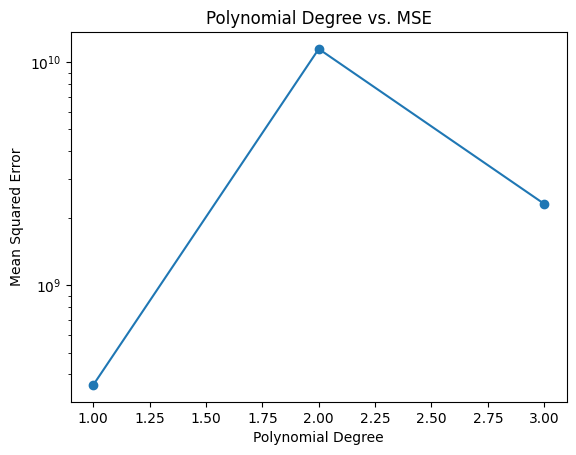

In [18]:
plt.plot(degrees, mse_values, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Degree vs. MSE')
plt.yscale('log')
plt.show()

In [19]:
best_degree = degrees[np.argmin(mse_values)]
print(f"Best Degree is: {best_degree} MSE = {min(mse_values)}")

Best Degree is: 1 MSE = 358214347.52876544
